<h1><center>Bivariate Analysis</center></h1>
<h1><center><u>"Categorical & Numerical"</u></center></h1>
<h1><center>features</center></h1>
<h1><center><u>ANOVA</u></center></h1>
<h2><center><u>Visualization, Hypothesis Testing</u></center></h2>

## Anova is statistical tool to examine differences in the "mean of response variable" for each category in explanatory variable.

  * Null Hypothesis(H0) is All population means are same (across different categories in explonatory variable).
  * Against to Alternative Hypothesis (H1) Not all of population means are equal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
employee_data=pd.read_csv('../../Data/employee_data.csv')
employee_data.head()

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode,Qualification,Degree,YearsOfStudy,EducationalInstitute,Gender,Empl_Band
0,e1,Director,15.0,85000,0.33,2,1332,Grad,NaN,15.0,clg,M,A
1,e2,Jr.Dev,3.0,25000,5.67,16,6666,Grad,Btech,16.0,clg,F,C
2,e3,Sr.Dev,6.0,36000,2.33,7,3332,PostGrad,Msc,17.0,unv,M,B
3,e4,Jr.Dev,2.0,20000,9.00,24,9999,NaN,Mtech,18.0,NaN,F,C
4,e5,Sr.Dev,5.0,37000,3.00,9,3999,NaN,Btech,16.0,NaN,F,B


### Let's try to analyze categorical column "Gender" as input and numerical column "Salary" as output feature

In [3]:
df = employee_data[['Gender','Salary']]
df.head()

,Gender,Salary
0,M,85000
1,F,25000
2,M,36000
3,F,20000
4,F,37000


In [4]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

<h1><center><u>Visualization</u></center></h1>


  
### Let's draw Bar chart and Box plot between "Salary" and "Gender", first we need to answer below questions to do so.
* Q1) What is the type of explanatory variable (Categorical/Quantitative) ?
  * **Ans:** "Gender" is a Categorical variable
  

* Q2) What is the type of the response variable (Categorical/Quantitative) ?
  * **Ans:** "Salary" is a Numerical variable
  


Text(-8.700000000000003, 0.5, 'Salary')

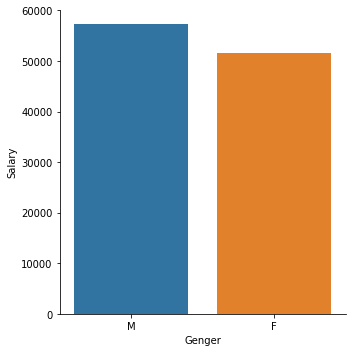

In [5]:
sns.catplot(data=df, x="Gender", y="Salary", kind="bar", ci=None)
plt.xlabel("Genger")
plt.ylabel("Salary")

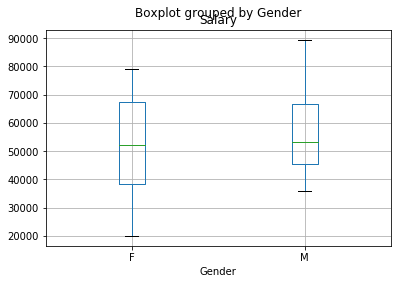

In [6]:
df.boxplot('Salary', by='Gender')

<h1><center><u>Hypothesis Testing</u></center></h1>

## Can we use "Gender" to predict "Salary" ?. Here we are checking whether is there any relationship exists in gender and salary.

### Hypothesis Testing : ANOVA Test
* **Null Hypothesis (H0):** "Gender" of the employee and "Salary" are independent
* **Alternate Hypothesis (H1):** "Gender" of the employee and "Salary" are not independent(dependent).

In [7]:
df.Gender.value_counts()

M    18
F    14
Name: Gender, dtype: int64

In [8]:
df.groupby('Gender').mean()

,Salary
Gender,
F,51543.071429
M,57219.000000


In [9]:
df.groupby('Gender').std()

,Salary
Gender,
F,18744.518905
M,15877.438518


In [10]:
import statsmodels.formula.api as smf


ols = smf.ols(formula='Salary ~ C(Gender)', data=df).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8597
Date:                Tue, 11 Feb 2020   Prob (F-statistic):              0.361
Time:                        17:45:04   Log-Likelihood:                -356.42
No. Observations:                  32   AIC:                             716.8
Df Residuals:                      30   BIC:                             719.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.154e+04   4591.198     11.226      0.000    4.22e+04    6.09e+04
C(Gender)[T.M]  5675.9286   6121.598      0.927      0.361   -6826.042    1.82e+04
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.119
Skew:                           0.161   Prob(JB):                        0.571
Kurtosis:                       2.142   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## probability of F-statistic : 0.361 which is greaterthan 0.05 
## so we can accept the null hypothesis
## that means there is no sufficient relationship exists between gender and salary(purely they are independent.)

### ------------------         ----------------------

## ANOVA (F-test) for an explonatory variable with morethan 2 categories and response(salary) varible.


<h1><center><u>Visualization</u></center></h1>

In [12]:
df1 = employee_data[['Empl_Band','Salary']].dropna()
print('data.shape:  ', df1.shape)
df1.head()

data.shape:   (32, 2)


,Empl_Band,Salary
0,A,85000
1,C,25000
2,B,36000
3,C,20000
4,B,37000


Text(-8.700000000000003, 0.5, 'Salary')

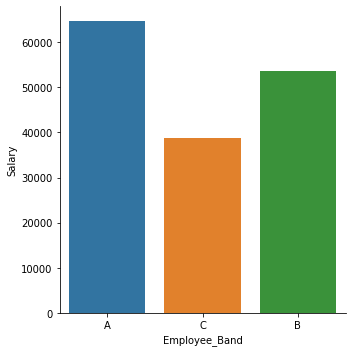

In [13]:
sns.catplot(data=df1, x="Empl_Band", y="Salary", kind="bar", ci=None)
plt.xlabel("Employee_Band")
plt.ylabel("Salary")

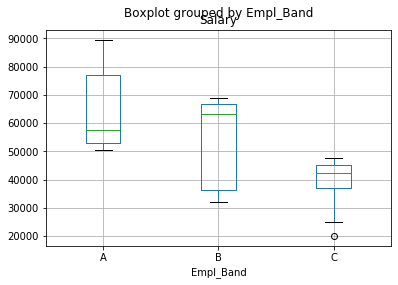

In [14]:
df1.boxplot('Salary', by='Empl_Band')

<h1><center><u>Hypothesis Testing</u></center></h1>

### Can we use "Employee Band" to predict "Salary" ?. Here we are checking whether is there any relationship exists in Employee Band and salary.
### Null Hypothesis (H0): There is no relationship between employeeband and salary.
####  (Employeeband and salary are independent.)
### Alternative Hypothesis (H1): Employee band and salary are interrealted.

In [15]:
df1.Empl_Band.value_counts()

A    14
B    10
C     8
Name: Empl_Band, dtype: int64

In [17]:
means = df1.groupby('Empl_Band').mean()
means

,Salary
Empl_Band,
A,64678.857143
B,53644.100000
C,38700.000000


In [18]:
stds = df1.groupby('Empl_Band').std()
stds

,Salary
Empl_Band,
A,14218.369542
B,15917.300563
C,10319.053113


In [19]:
ols2 = smf.ols(formula='Salary ~ C(Empl_Band)', data = df1).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     8.856
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           0.000995
Time:                        18:04:16   Log-Likelihood:                -349.24
No. Observations:                  32   AIC:                             704.5
Df Residuals:                      29   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.468e+04   3731.681     17.332      0.000     5.7e+04    7.23e+04
C(Empl_Band)[T.B] -1.103e+04   5781.096     -1.909      0.066   -2.29e+04     788.911
C(Empl_Band)[T.C] -2.598e+04   6188.293     -4.198      0.000   -3.86e+04   -1.33e+04
==============================================================================
Omnibus:                       11.628   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                2.562
Skew:                          -0.054   Prob(JB):                        0.278
Kurtosis:                       1.618   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The P-Value 0.000995 < 0.05, so we can reject null hypothesis.

### but here we have more than 2 categories in explonatory variable, so there is a chance of type1 or type2 error
  * Type I Error : An in-correct decision made "to reject Null Hypothesis". 
  * Type II Error : An in-correct decision made "to accept Null Hypothesis".  


### When there are more than 2 categories in explonatory variable (Employee Band), we should PAIR wise ANOVA (POST HOC Test) so we go through with "tukey's honestly significance difference test".
  * Here also the Significance Level will be adjusted (called as Family-wise P-Value), the foumula is as below.
  * Family-wise P-Value: When we did pair-wise comparisions, P-Value will increase as it uses below formula 
    * $\alpha_{FW} = 1 - (1-\alpha_{PC})^c $
    * c = Number of pair-wise comparisions
    * $\alpha$ = Normal Type 1 Error (0.05) 


In [20]:
import statsmodels.stats.multicomp as multi

mc1 = multi.MultiComparison(df1['Salary'], df1['Empl_Band'])
res1 = mc1.tukeyhsd()
print(res1.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     A      B -11034.7571 0.1543  -25309.109   3239.5947  False
     A      C -25978.8571  0.001 -41258.6379 -10699.0764   True
     B      C    -14944.1 0.0785 -31297.4244   1409.2244  False
---------------------------------------------------------------
